<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

Cuando se necesita ingresar una gran cantidad de datos a un árbol para posteriormente realizar busquedas en este se debería considerar, en caso que se pueda, dejar los datos que se utilicen con mayor frecuencia más cerca de la raíz, para realizar la busqueda de estos con mayor rapidez.

Esto busca organizar según su frecuencia de aparicion los datos de manera que se minimice la cantidad de datos visitados a la hora de buscarlos.

Entrada: una secuencia ordenada de n claves.

Salida: un árbol de busqueda que minimice el costo esperado a la hora de realizar busquedas.


#2. Descripción del algoritmo

El algoritmo del $Optimal BST$ recibe claves con las que va a confeccionar un árbol que reduzca el costo de búsqueda de los nodos.

La creación del árbol se hace realizando particiones sobre el arreglo con los datos, de esta forma se va a ir subdividiendo y donde cada pivote va a ser un nodo del árbol, esto se debe realizar hasta que se llegue al caso base que es cuando el subarreglo tenga tamaño $0$, lo que significa que ese pivote es un nodo hoja.

La subestructura óptima de este algoritmo se basa en ir dividiendo en subarreglos e ir calculando el costo mínimo a partir de estos subproblemas que se generen.

#2.1 Implementación del codigo recursivo

In [22]:
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q

In [14]:
llamadasRec = 0
def minCost(frec, i, j):
  global llamadasRec
  llamadasRec += 1                                                  #contador para las llamadas recursivas

  if j < i:                                                         #return para los casos base
      return 0
  if j == i:     
    return frec[i]
     
  aux = 0                                                           #se suman todas las frecuencias
  for k in range(i, j + 1):
    aux += frec[k]
    
  min = float("inf")                                                #se inicia una variable con infinito para luego almacenar el costo minimo
     
  for r in range(i, j + 1):                                         #se calcula el costo minimo de los subproblemas que se generan
    costo = (minCost(frec, i, r - 1) + minCost(frec, r + 1, j))
    if costo < min:
      min = costo                                                   #en caso de encontrar un costo menor al ya guardado se cambia

  return min + aux

In [15]:
def optimalSearchTree(claves, frec, n):                             #el programa asume que se le entregan keys ordenadas
  #dibujar el arbol con visualize
  return minCost(frec, 0, n - 1)

In [18]:
import random
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
nullnodes=0
def generate_binary_tree(T,A):
    global nullnodes
    if len(A)==1: 
      T.add_node(A[0])
      return A[0]
    else:
      pivote = random.randint(0,len(A)-1)
      T.add_node(A[pivote])

      if pivote > 0:
        left_node = generate_binary_tree(T,A[0:pivote])
        T.add_edge(A[pivote],left_node)
      elif pivote ==0: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1
      
      if pivote < len(A)-1:
        right_node = generate_binary_tree(T,A[pivote+1:])
        T.add_edge(A[pivote],right_node)
      else: 
        T.add_edge(A[pivote],"nil"+str(nullnodes)); nullnodes+=1

      return A[pivote]

[6, 7, 9, 11, 18, 34, 61, 70, 97, 98]
[0.05442403367592378, 0.09531157033511428, 0.00031045866379500583, 0.0338178399819576, 0.07121079885981066, 0.03594708969471942, 0.012148120811587072, 0.04780344622659646, 0.014496878337020527, 0.08928016645274549]
El costo esperado es de 1.1056700526488814 con 32805 llamadas


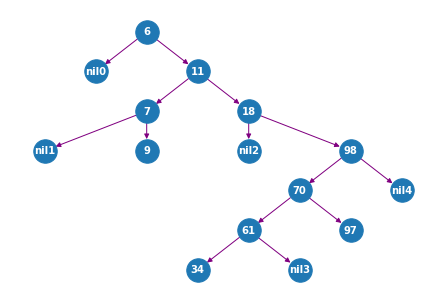

In [32]:
#claves = [10, 12, 20 ,5 ,34, 23, 52]
#frec= [34, 8, 50, 1, 23, 7, 17]
#n = len(claves)

claves,frec,n = optimal_bst_instance_generator(10)
print(claves)
print(frec)
n = len(claves)

print(f"El costo esperado es de {optimalSearchTree(claves, frec, n)} con {llamadasRec} llamadas" )
llamadasRec = 0

T = nx.DiGraph()
generate_binary_tree(T,claves)

pos = graphviz_layout(T, prog="dot")

# para mostrar los nodos en sus posiciones y colores, tamaños, etc.
nx.draw(T,pos, with_labels=True, node_size=550, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="purple")
nullnodes = 0

0 idea de como hacer el arbol